## Hypothesis tests
In this notebook we first investigate the distribution of the mean of a dataset and we simulate several hypothesis tests.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

### Sample standard deviation
The sample standard deviation $s_n$ of a dataset of $n$ values is defined as

$s_n = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$

and can be computed with the `std` function of the `numpy` package. By default, the `std` function devides the sum by $n$ rather than by $n-1$. To divide by $n-1$, as we want for an unbiased estimate of the standard deviation, specify the keyword argument `ddof=1` in the `np.std` function.

### Exercise 1. <a name="back1"></a>Histogram of the means of datasets with 30 values
Load the data from a data file, test_data_30.csv, and store them in an array of length 1000. Compute the mean of the means and the standard deviation of the means, and print them to the screen. Draw a boxplot of the means. In a separate figure, draw a histogram of the means. Make sure the vertical axis of the boxplot and the horizontal axis of the histogram extend from 0 to 80.

('sample mean, standard deviation of sample mean: ', 43.28166666666666, 16.77620874587156)


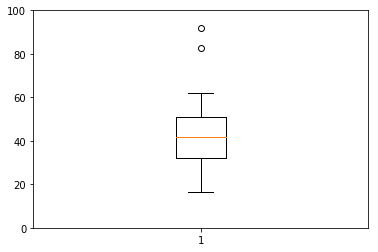

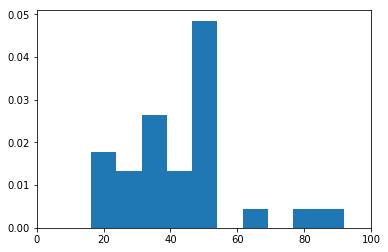

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from pandas import read_csv

data = read_csv('douglas_western_data_30.csv', skiprows=[1], skipinitialspace=True)
N = len(data.bstrength)
xbar = np.mean(data.bstrength)
sig = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean: ', xbar, sig)

plt.figure()
plt.boxplot(data.bstrength)
plt.ylim(0, 100)
plt.show()

plt.figure()
plt.hist(data.bstrength, normed=True)
plt.xlim(0,100)
plt.show()

### Exercise 2. <a name="back1"></a>Histogram of the means of datasets with 20 values
Load the data from a data file, test_data_20.csv, and store them in an array of length 20. Compute the mean of the means and the standard deviation of the means, and print them to the screen. Draw a boxplot of the means. In a separate figure, draw a histogram of the means. Make sure the vertical axis of the boxplot and the horizontal axis of the histogram extend from 0 to 80.

('sample mean, standard deviation of sample mean: ', 49.3275, 17.33832684060313)


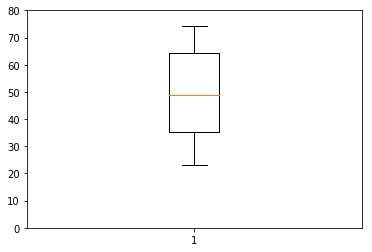

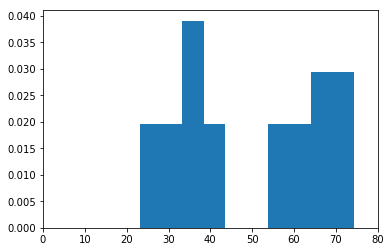

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from pandas import read_csv

data = read_csv('douglas_data_20.csv', skiprows=[1], skipinitialspace=True)
N = len(data.bstrength)
xbar = np.mean(data.bstrength)
sig = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean: ', xbar, sig)

plt.figure()
plt.boxplot(data.bstrength)
plt.ylim(0, 80)
plt.show()

plt.figure()
plt.hist(data.bstrength, normed=True)
plt.xlim(0,80)
plt.show()

### Exercise 3. <a name="back1"></a>z-test with 30 values
Load the data from test_data_30.csv. Compute the sample mean and the standard deviation of the sample mean. Perform a z-test (significance level 0.05) with null hypothesis that the mean of x4 is 45 mm and alternative hypothesis that the mean is less than 45 mm. Assumple that the population is normally distributed. Since the sample size is large, you can use the sample standard disbrituion for the standard distribution for the population. 

('sample mean, standard deviation of sample mean: ', 49.03220000000001, 14.222701211622987)
('z-statistic: ', -0.48115891113080761)
('p-value: ', 0.31520178058416348)


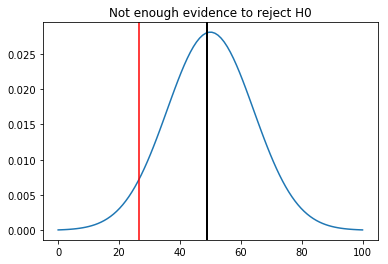

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from scipy.stats import norm
from pandas import read_csv

data = read_csv('douglas_data_50.csv', skiprows=[1], skipinitialspace=True)
N = len(data.bstrength)
xbar = np.mean(data.bstrength)
sig = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean: ', xbar, sig)

mu0 = 50
alpha = 0.05

zstat = (xbar - mu0) / (sig/np.sqrt(N))
print('z-statistic: ', zstat)
pval = norm.cdf(zstat)
print('p-value: ', pval)

x = np.linspace(0,100,100)
y = norm.pdf(x, loc=mu0, scale=sig)
plt.plot(x,y)

perc05 = norm.ppf(alpha, loc=mu0, scale=sig)
plt.axvline(perc05, color='r')
plt.axvline(xbar, color='k', lw=2)

if pval < alpha:
    plt.title('enough evidence to reject H0')
else:
    plt.title('Not enough evidence to reject H0')
    
plt.show()

### Exercise 4. <a name="back1"></a>t-test with 20 values
Load the data from test_data_20.csv. Compute the sample mean and the standard deviation of the sample mean. Perform a t-test (significance level 0.05) with null hypothesis that the mean of x4 is 45 mm and alternative hypothesis that the mean is less than 45 mm. 

('sample mean, standard deviation of sample mean: ', 49.3275, 17.33832684060313)
('t-statistic: ', -0.17346030314148786)
('p-value: ', 0.43206214808102172)
('This is the verificaton of alpha value: ', 0.050000000000000169)


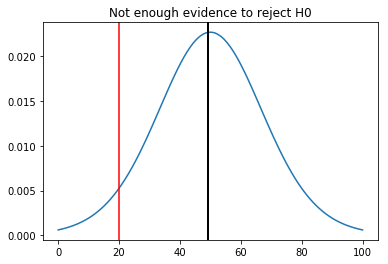

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from scipy.stats import t
from pandas import read_csv

data = read_csv('douglas_data_20.csv', skiprows=[1], skipinitialspace=True)
N = len(data.bstrength)
xbar = np.mean(data.bstrength)
sig = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean: ', xbar, sig)
mu0 = 50
alpha = 0.05
dof = N - 1

tstat = (xbar - mu0) / (sig/np.sqrt(N))
print('t-statistic: ', tstat)

pval = t.sf(np.abs(tstat), N-1) 
print('p-value: ', pval)

x = np.linspace(0,100,100)
y = t.pdf(x, dof, loc=mu0, scale=sig)
plt.plot(x,y)


perc05 = t.ppf(alpha, dof, loc=mu0, scale=sig)
calAlpha = t.cdf(perc05, dof, loc=mu0, scale=sig)
print ('This is the verificaton of alpha value: ', calAlpha)

plt.axvline(perc05, color='r')
plt.axvline(xbar, color='k', lw=2)


if pval < alpha:
    plt.title('enough evidence to reject H0')
else:
    plt.title('Not enough evidence to reject H0')
    
plt.show()

### Exercise 5. <a name="back1"></a>F-test on two populations
Load the data from a population A (test_data_20.csv) and another population B (test_data_30.csv). Compute the sample mean and the standard deviation for each of the populations. Perform a F-test (significance level 0.05) with null hypothesis that the variance of x4 of A is the same as the variance of x4 of B and alternative hypothesis that the variance of x4 of A is less than the variance of x4 of B. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd
from scipy.stats import f

from pandas import read_csv

data1 = read_csv('douglas_eastern_data_42.csv', skiprows=[1], skipinitialspace=True)
N1 = len(data1.bstrength)
xbar1 = np.mean(data1.bstrength)
sig1 = np.std(data1.bstrength, ddof=1)

data2 = read_csv('douglas_western_data_30.csv', skiprows=[1], skipinitialspace=True)
N2 = len(data2.bstrength)
xbar2 = np.mean(data2.bstrength)
sig2 = np.std(data2.bstrength, ddof=1)

print('sample mean, standard deviation of sample mean for eastern data: ',xbar1, sig1)
print('sample mean, standard deviation of sample mean for western data: ', xbar2, sig2)

alpha = 0.05
dof1 = N1 - 1
dof2 = N2 - 1

Fstat = np.var(data1.bstrength) / np.var(data2.bstrength)

single_tailed_pval =1-f.cdf(Fstat, dof1, dof2)
print(single_tailed_pval)

if single_tailed_pval < 0.05:
    print ('enough evidence to reject H0')
else:
    print ('Not enough evidence to reject H0')

('sample mean, standard deviation of sample mean for eastern data: ', 52.09357142857142, 16.56484682538393)
('sample mean, standard deviation of sample mean for western data: ', 43.28166666666666, 16.77620874587156)
0.525798119384
Not enough evidence to reject H0


In [5]:
## two population z - test
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sp
import numpy.random as rnd

from scipy.stats import norm
from pandas import read_csv

data = read_csv('douglas_eastern_data_42.csv', skiprows=[1], skipinitialspace=True)
N1 = len(data.bstrength)
xbar1 = np.mean(data.bstrength)
sig1 = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean(eastern): ', xbar1, sig1)

data = read_csv('douglas_western_data_30.csv', skiprows=[1], skipinitialspace=True)
N2 = len(data.bstrength)
xbar2 = np.mean(data.bstrength)
sig2 = np.std(data.bstrength, ddof=1)
print('sample mean, standard deviation of sample mean(western): ', xbar2, sig2)

mu0 = 0
alpha = 0.05

zstat = (xbar1 - xbar2 - mu0) / np.sqrt((sig1*sig1)/N1 + (sig2*sig2)/N2)
print('z-statistic: ', zstat)
pval = norm.cdf(zstat)
print('p-value: ', pval)



if pval < alpha:
    print('enough evidence to reject H0')
else:
    print('Not enough evidence to reject H0')
    


('sample mean, standard deviation of sample mean(eastern): ', 52.09357142857142, 16.56484682538393)
('sample mean, standard deviation of sample mean(western): ', 43.28166666666666, 16.77620874587156)
('z-statistic: ', 2.2088813331532684)
('p-value: ', 0.986408552047216)
Not enough evidence to reject H0
